In [1]:
import pandas as pd
from random import randint
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split

#enc = OneHotEncoder()

pd.set_option('display.max_columns', 500)
pd.set_option('display.expand_frame_repr', False)

In [81]:
df = pd.read_csv('size.txt')

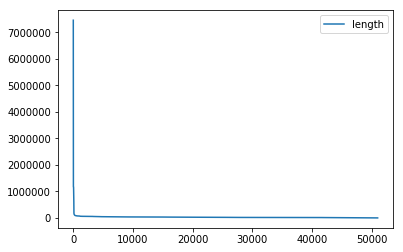

In [82]:
df.plot()

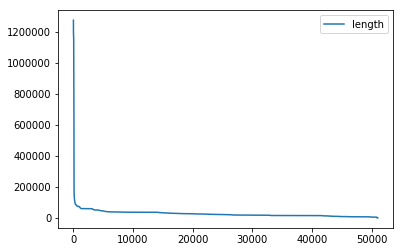

In [83]:
df = df.drop([0])
df.plot()

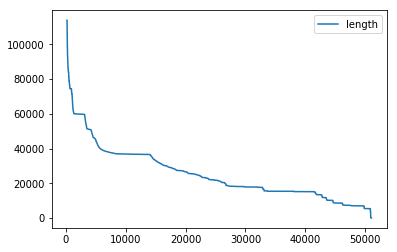

In [84]:
df = df.drop(range(1,200))
df.plot()

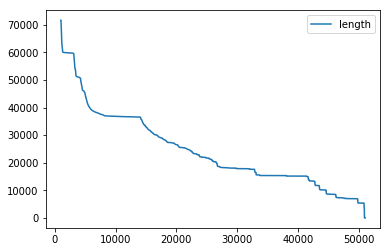

In [86]:
df = df.drop(range(200,1000))
df.plot()

In [2]:
df_to_analyze = pd.read_csv('test.csv', encoding = "ISO-8859-1", low_memory = False)
df_to_analyze = df_to_analyze.drop(['Unnamed: 0'], axis = 1)
df_to_analyze.describe(include = 'all')

,Applicant: Gender,Applicant: Country of Citizenship,Applicant: Canada Status,Applicant: Birthdate,Applicant: Aboriginal Student,Applying for Financial Aid,Program Of Interest (HEDA),Stream (Account LU),National Student Status,Highest Stage Reached,Applicant: Source Code,Entrance Type,Admit City,Admit State/Province,Admit Country,Current Region,File Forwarded Deferred Application,Closed File Disposition,Candidate Decision,School Decision,Distance_From_TWU,Days At Inquiry,Days At App Started,Days At App Submitted,Days At App Complete,Days At Admit,Days At Deposit,Days At Pre-Enrolled,Days At Paid,Days At Enrolled,merge_GPA,term_season
count,12153,12153,12153,12153,12153.000000,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153.000000,12153,12153,12153,12153.000000,12153.000000,12153.000000,12153.000000,12153.000000,12153.000000,12153.000000,12153.000000,12153.000000,12153.0,12153.000000,12153
unique,3,149,19,4328,NaN,3,102,10,4,8,158,3,2705,101,166,69,NaN,14,4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Female,Canada,Unknown,Unknown,NaN,No,Nursing,Unknown,Canadian,App Submitted,Online App v2,New,Surrey,British Columbia,Canada,UG International Students,NaN,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall
freq,7431,7207,5594,338,NaN,7214,1305,11719,7308,4326,2481,7772,1457,6209,8205,1337,NaN,9245,7159,7614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10094
mean,NaN,NaN,NaN,NaN,0.031186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090759,NaN,NaN,NaN,1067.579755,45.823500,3.027977,16.903563,1.447873,11.959928,6.630626,12.703365,1.177158,-1.0,1.462457,NaN
std,NaN,NaN,NaN,NaN,0.173827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.287279,NaN,NaN,NaN,2958.876224,133.770673,18.679089,41.169271,10.167448,34.907040,21.740674,30.729625,8.459268,0.0,2.264624,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-1.000000,0.000000,-249.000000,-1.000000,-28.000000,-281.000000,-1.000000,-31.000000,-106.000000,-1.0,-1.000000,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,NaN
50%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,2.300000,NaN
75%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,91.181360,13.000000,0.000000,16.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,3.700000,NaN


In [3]:
####target class
y = df_to_analyze['Highest Stage Reached']
####training Matrix
X = df_to_analyze.drop('Highest Stage Reached', axis = 1)

X.sample(9)

,Applicant: Gender,Applicant: Country of Citizenship,Applicant: Canada Status,Applicant: Birthdate,Applicant: Aboriginal Student,Applying for Financial Aid,Program Of Interest (HEDA),Stream (Account LU),National Student Status,Applicant: Source Code,Entrance Type,Admit City,Admit State/Province,Admit Country,Current Region,File Forwarded Deferred Application,Closed File Disposition,Candidate Decision,School Decision,Distance_From_TWU,Days At Inquiry,Days At App Started,Days At App Submitted,Days At App Complete,Days At Admit,Days At Deposit,Days At Pre-Enrolled,Days At Paid,Days At Enrolled,merge_GPA,term_season
5803,Female,United States of America,Not a Resident,12/05/1998,0,No,Natural & Applied Sciences,Unknown,American,High School Visit,Transfer,Lynden,Washington,United States of America,UG Washington North,0,Unknown,Unknown,Final Admit,-1.000000,59,0,32,1,107,10,86,0,-1,3.51,Fall
9870,Female,Canada,Unknown,07/07/1999,0,Yes,Nursing,Unknown,Canadian,Stealth Application,New,Abbotsford,British Columbia,Canada,UG Abbotsford,0,Unknown,Unknown,Admit Conditionally,26.821858,0,83,4,2,171,0,6,33,-1,3.70,Fall
9937,Female,Canada,Unknown,10/06/1996,0,Yes,History,Unknown,Canadian,TWU Choir Tour,New,Surrey,British Columbia,Canada,UG Surrey 1,0,Unknown,Unknown,Final Admit,-1.000000,518,0,8,0,63,15,83,0,-1,3.70,Fall
7312,Male,Canada,Citizen,13/08/1998,0,No,Business Administration (B.A.),Unknown,Canadian,High School Visit,New,Burnaby,British Columbia,Canada,UG Burnaby,0,Unknown,Unknown,Final Admit,26.354307,81,0,8,0,194,1,1,0,-1,4.00,Fall
2093,Male,United States of America,I currently do not live in Canada,09/12/1998,0,Yes,Business Administration (B.A.),Leadership and Management,American,Stealth Application,New,Cashmere,Washington,United States of America,UG Washington North,0,Unknown,Unknown,Final Admit,238.185220,0,0,50,9,241,2,10,25,-1,3.51,Fall
11685,Female,Canada,Citizen,29/12/1997,0,No,Human Kinetics (Physical Education),Unknown,Canadian,Campus Visit Registration,New,Surrey,British Columbia,Canada,UG Surrey 1,1,Expired,Unknown,Final Admit,7.476338,0,0,5,0,94,-1,-1,-1,-1,2.70,Fall
4393,Male,China,I am living in Canada with a study visa,31/03/1992,0,Unknown,Business Administration (B.A.),Marketing,International,TWU RFI,New,Northridge,California,United States of America,UG California South,0,Expired,Unknown,Unknown,1689.634067,3,-1,-1,-1,-1,-1,-1,-1,-1,-1.00,Fall
7153,Female,Brazil,I currently do not live in Canada,06/05/1996,0,Yes,International Studies,Unknown,International,Stealth Application,Transfer,Rio de Janeiro,Unknown,Brazil,UG International Spring,1,Unknown,Unknown,Unknown,11177.153449,0,-1,-1,-1,-1,-1,-1,-1,-1,-1.00,Spring
2050,Female,South Korea,I currently do not live in Canada,04/01/1997,0,No,Art and Design,Unknown,International,Stealth Application,Transfer,Suwon,Unknown,South Korea,UG Transfer International Fall,0,Expired,Unknown,Unknown,8222.492114,0,0,-1,-1,-1,-1,-1,-1,-1,-1.00,Fall


In [4]:
vec = DictVectorizer()
D = X.to_dict('records')
D

[{'Admit City': 'Coquitlam',
  'Admit Country': 'Canada',
  'Admit State/Province': 'British Columbia',
  'Applicant: Aboriginal Student': 0,
  'Applicant: Birthdate': '03/08/1998',
  'Applicant: Canada Status': 'Unknown',
  'Applicant: Country of Citizenship': 'Canada',
  'Applicant: Gender': 'Female',
  'Applicant: Source Code': 'Stealth Application',
  'Applying for Financial Aid': 'No',
  'Candidate Decision': 'Unknown',
  'Closed File Disposition': 'Expired',
  'Current Region': 'UG TriCityArea',
  'Days At Admit': -1,
  'Days At App Complete': -1,
  'Days At App Started': -1,
  'Days At App Submitted': -1,
  'Days At Deposit': -1,
  'Days At Enrolled': -1,
  'Days At Inquiry': 0,
  'Days At Paid': -1,
  'Days At Pre-Enrolled': -1,
  'Distance_From_TWU': -1.0,
  'Entrance Type': 'New',
  'File Forwarded Deferred Application': 0,
  'National Student Status': 'Canadian',
  'Program Of Interest (HEDA)': 'Art and Design',
  'School Decision': 'Unknown',
  'Stream (Account LU)': 'Unkno

In [12]:
v = vec.fit_transform(D)
print(D[0])
print(v[0])

{'Applicant: Gender': 'Female', 'Applicant: Country of Citizenship': 'Canada', 'Applicant: Canada Status': 'Unknown', 'Applicant: Birthdate': '03/08/1998', 'Applicant: Aboriginal Student': 0, 'Applying for Financial Aid': 'No', 'Program Of Interest (HEDA)': 'Art and Design', 'Stream (Account LU)': 'Unknown', 'National Student Status': 'Canadian', 'Applicant: Source Code': 'Stealth Application', 'Entrance Type': 'New', 'Admit City': 'Coquitlam', 'Admit State/Province': 'British Columbia', 'Admit Country': 'Canada', 'Current Region': 'UG TriCityArea', 'File Forwarded Deferred Application': 0, 'Closed File Disposition': 'Expired', 'Candidate Decision': 'Unknown', 'School Decision': 'Unknown', 'Distance_From_TWU': -1.0, 'Days At Inquiry': 0, 'Days At App Started': -1, 'Days At App Submitted': -1, 'Days At App Complete': -1, 'Days At Admit': -1, 'Days At Deposit': -1, 'Days At Pre-Enrolled': -1, 'Days At Paid': -1, 'Days At Enrolled': -1, 'merge_GPA': -1.0, 'term_season': 'Fall'}
  (0, 549)

In [33]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
l = lbl.fit_transform(X["Applicant: Country of Citizenship"])
x = pd.concat([X, pd.DataFrame(l, columns=['countrylabel'])])

In [34]:
x

,Admit City,Admit Country,Admit State/Province,Applicant: Aboriginal Student,Applicant: Birthdate,Applicant: Canada Status,Applicant: Country of Citizenship,Applicant: Gender,Applicant: Source Code,Applying for Financial Aid,Candidate Decision,Closed File Disposition,Current Region,Days At Admit,Days At App Complete,Days At App Started,Days At App Submitted,Days At Deposit,Days At Enrolled,Days At Inquiry,Days At Paid,Days At Pre-Enrolled,Distance_From_TWU,Entrance Type,File Forwarded Deferred Application,National Student Status,Program Of Interest (HEDA),School Decision,Stream (Account LU),countrylabel,merge_GPA,term_season
0,Coquitlam,Canada,British Columbia,0.0,03/08/1998,Unknown,Canada,Female,Stealth Application,No,Unknown,Expired,UG TriCityArea,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.000000,New,0.0,Canadian,Art and Design,Unknown,Unknown,NaN,-1.00,Fall
1,Bruno,Canada,Saskatchewan,0.0,15/07/1992,Unknown,Canada,Male,PW Mar 2014 Registration,No,Withdrawn,Unknown,UG Transfer Canada East Fall,-1.0,4.0,0.0,28.0,-1.0,-1.0,3.0,-1.0,-1.0,1248.219688,Transfer,0.0,Canadian,Philosophy,Unknown,Unknown,NaN,3.70,Fall
2,Buea,Cameroon,Unknown,0.0,02/06/1987,Not a Resident,Cameroon,Male,Online App v2,No,Withdrawn,Unknown,UG International Transfer Spring,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.000000,Transfer,0.0,International,Business Administration (B.B.A.),Unknown,Unknown,NaN,-1.00,Spring
3,Adum-kumasi,Ghana,Unknown,0.0,04/08/1995,I currently do not live in Canada,Ghana,Male,Stealth Application,Unknown,Unknown,Expired,UG International Students,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.000000,New,0.0,International,Physics,Unknown,Unknown,NaN,-1.00,Fall
4,Delta,Canada,British Columbia,0.0,14/07/1999,Unknown,Canada,Female,High School Visit,Unknown,Withdrawn,Unknown,UG Richmond,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,446.0,-1.0,-1.0,22.758974,New,0.0,Canadian,Pre-Medicine,Unknown,Unknown,NaN,-1.00,Fall
5,Accra,Ghana,Unknown,0.0,07/05/1992,Not a Resident,Ghana,Female,Online App v2,No,Withdrawn,Unknown,UG Transfer International Fall,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.000000,Transfer,0.0,International,Pre-Medicine,Unknown,Unknown,NaN,-1.00,Fall
6,North Vancouver,Canada,British Columbia,0.0,15/02/1998,Study Permit,Nigeria,Female,High School Visit,No,Withdrawn,Unknown,UG Vancouver,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.000000,New,1.0,International,Pre-Medicine,Unknown,Unknown,NaN,-1.00,Fall
7,Addis Abeba,Ethiopia,Unknown,0.0,28/08/1995,Not a Resident,Ethiopia,Male,Online App v2,No,Withdrawn,Unknown,UG International Spring,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,13294.751044,New,1.0,International,Social Studies,Unknown,Unknown,NaN,-1.00,Spring
8,ikeja,Nigeria,Unknown,0.0,20/09/1985,I currently do not live in Canada,Nigeria,Male,Stealth Application,Yes,Unknown,Expired,UG International Students,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.000000,New,0.0,International,Computing Science,Unknown,Unknown,NaN,-1.00,Fall
9,Wah can't,Pakistan,Unknown,1.0,27/07/1990,I currently do not live in Canada,Pakistan,Male,Stealth Application,Unknown,Unknown,Expired,UG International Students,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,10686.426154,New,0.0,International,Environmental Studies (B.A.),Unknown,Unknown,NaN,-1.00,Fall


In [6]:
X.shape

(12153, 31)

In [7]:
Xvec = vec.fit_transform(D)
Xvec.shape

(12153, 7859)

In [8]:
Xvec

<12153x7859 sparse matrix of type '<class 'numpy.float64'>'
	with 328054 stored elements in Compressed Sparse Row format>

In [10]:
# test_dict, train_dict = train_test_split(df_to_analyze_array, test_size = .7, train_size = .3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train[0])
print(X_train.loc[0])

(8507, 31)
(3646, 31)
App Started
Applicant: Gender                                   Female
Applicant: Country of Citizenship                   Canada
Applicant: Canada Status                           Unknown
Applicant: Birthdate                            03/08/1998
Applicant: Aboriginal Student                            0
Applying for Financial Aid                              No
Program Of Interest (HEDA)                  Art and Design
Stream (Account LU)                                Unknown
National Student Status                           Canadian
Applicant: Source Code                 Stealth Application
Entrance Type                                          New
Admit City                                       Coquitlam
Admit State/Province                      British Columbia
Admit Country                                       Canada
Current Region                              UG TriCityArea
File Forwarded Deferred Application                      0
Closed File Dispositio

In [11]:
X_train, X_test, y_train, y_test = train_test_split(Xvec, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train[0])
print(X_train[0])

(8507, 7859)
(3646, 7859)
App Started
  (0, 7857)	1.0
  (0, 7856)	2.0
  (0, 7855)	1.0
  (0, 7844)	1.0
  (0, 7809)	1.0
  (0, 7735)	1.0
  (0, 7732)	1.0
  (0, 7729)	104.50010677996299
  (0, 7728)	38.0
  (0, 7725)	-1.0
  (0, 7724)	5.0
  (0, 7723)	6.0
  (0, 7721)	8.0
  (0, 7720)	3.0
  (0, 7663)	1.0
  (0, 7648)	1.0
  (0, 7635)	1.0
  (0, 7632)	1.0
  (0, 7526)	1.0
  (0, 7469)	1.0
  (0, 7345)	1.0
  (0, 7302)	1.0
  (0, 4617)	1.0
  (0, 2881)	1.0
  (0, 2734)	1.0
  (0, 1569)	1.0


In [12]:
c = svm.SVC()
c.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
p = c.predict(X_test)

In [14]:
df = pd.DataFrame()
df['predicted'] = p
df['actual'] = y_test
df['correct'] = df['predicted'] == df['actual']
print(df.loc[pd.notnull(df['actual'])].count())
df.loc[pd.notnull(df['actual']) & df['correct']].count()

predicted    1117
actual       1117
correct      1117
dtype: int64


predicted    355
actual       355
correct      355
dtype: int64

In [26]:
import sklearn.metrics as m
m.accuracy_score(p, y_test)

0.769884805266045

In [29]:
m.classification_report(y_test, p)

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'               precision    recall  f1-score   support\n\n        Admit       0.79      0.83      0.81       956\n App Complete       0.00      0.00      0.00       132\n  App Started       0.25      0.04      0.06       282\nApp Submitted       0.71      0.94      0.81      1321\n      Deposit       0.76      0.24      0.36        80\n     Enrolled       0.90      0.92      0.91       803\n         Paid       0.00      0.00      0.00        23\n Pre-Enrolled       0.70      0.14      0.24        49\n\n  avg / total       0.71      0.77      0.72      3646\n'

In [30]:
m.confusion_matrix(y_test, p)

array([[ 791,    0,    6,  139,    0,   20,    0,    0],
       [  94,    0,    1,   36,    0,    1,    0,    0],
       [  23,    0,   10,  241,    0,    8,    0,    0],
       [  45,    0,   19, 1242,    0,   15,    0,    0],
       [  25,    0,    2,   27,   19,    6,    0,    1],
       [  19,    0,    2,   41,    1,  738,    0,    2],
       [   3,    0,    0,    4,    0,   16,    0,    0],
       [   6,    0,    0,   11,    5,   20,    0,    7]])

In [49]:
m.f1_score(y_test, p, average='weighted')

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7210785178591667

In [38]:
m.fbeta_score(y_test, p, beta=0.142857, average=None)

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.78706468, 0.        , 0.22301521, 0.71684173, 0.72796941,
       0.89608781, 0.        , 0.64935074])

In [39]:
m.hamming_loss(y_test, p)

0.23011519473395503

In [40]:
m.jaccard_similarity_score(y_test, p)

0.769884805266045

In [48]:
m.precision_score(y_test, p, average='weighted')

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7073112245584896

In [54]:
m.recall_score(y_test, p, average='weighted')

0.769884805266045

In [55]:
m.zero_one_loss(y_test, p)

0.23011519473395503

In [91]:
lossbytestsize = pd.DataFrame(columns=['hamming_loss'])
count = 10

for ts in np.arange(0.05, 0.96, 0.05):
    total = 0
    for i in range(count):
        X_train, X_test, y_train, y_test = train_test_split(Xvec, y, test_size=ts)
        c = svm.SVC()
        c.fit(X_train, y_train)
        p = c.predict(X_test)
        loss = m.hamming_loss(y_test, p)
        total += loss
    avg = total / count
    lossbytestsize.loc[ts] = avg

lossbytestsize

,hamming_loss
0.05,0.220066
0.10,0.226974
0.15,0.232858
0.20,0.230687
0.25,0.232938
0.30,0.236286
0.35,0.235472
0.40,0.239675
0.45,0.243481
0.50,0.246536


In [95]:
lossbytestsize = pd.DataFrame(columns=['hamming_loss'])
count = 10

for ts in np.arange(0.05, 0.40, 0.01):
    total = 0
    for i in range(count):
        X_train, X_test, y_train, y_test = train_test_split(Xvec, y, test_size=ts)
        c = svm.SVC()
        c.fit(X_train, y_train)
        p = c.predict(X_test)
        loss = m.hamming_loss(y_test, p)
        total += loss
    avg = total / count
    lossbytestsize.loc[ts] = avg

lossbytestsize

,hamming_loss
0.05,0.220559
0.06,0.229041
0.07,0.220917
0.08,0.223022
0.09,0.221481
0.10,0.225247
0.11,0.230516
0.12,0.231254
0.13,0.229494
0.14,0.225852
